# imports

In [39]:
# !pip install pandas
# !pip install openpyxl
# !pip install requests
# !pip install tqdm
# !pip install seaborn
# !pip install -U tsfresh
# !pip install --upgrade "setuptools<81"
# # !pip install numpy==1.26.4
# !pip install --upgrade numpy
# !pip install numba
# !pip install ydata-profiling
# !pip install ipywidgets


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
import sys
import os
import numpy as np

# from tsfresh.utilities.dataframe_functions import impute
# from tsfresh import extract_features, select_features

# from ydata_profiling import ProfileReport


project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.denis.main import prepare_data


# Создание df

In [41]:
RANDOM_STATE = 239

df = pd.read_excel("../data/target.xlsx", sheet_name="data cleaned")
df.drop("start_date", axis=1, inplace=True)

In [42]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['state'])
df_encoded.head(2)

,year,month,nps,state_Алтайский край,state_Амурская область,state_Архангельская область,state_Астраханская область,state_Брянская область,state_Владимирская область,state_Волгоградская область,...,state_Томская область,state_Тульская область,state_Тюменская область,state_Ульяновская область,state_Хабаровский край,state_Ханты-Мансийский автономный округ - Югра,state_Челябинская область,state_Чеченская Республика,state_Чувашская Республика - Чувашия,state_Ярославская область
0,2024,10,8,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024,10,10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# df_weather_grouped = df.groupby(['year', 'month', 'state'], as_index=False)['nps'].mean()
# df_weather_grouped = prepare_data(df_weather_grouped, weather_cache_path='../cache/weather_cache.pkl')

# df_weather_grouped_encoded = pd.get_dummies(df_weather_grouped, columns=['state']) # One-Hot Encoding
# df_weather_grouped_encoded.head(2)

In [44]:
df_target = df[["year", "month", "state", "nps"]].copy()
df_target_2024 = df_target[df_target["year"] == 2024].copy()
big_states = ["Москва", "Московская область", "Санкт-Петербург", "Краснодарский край", "Ростовская область"]
df_target_2024.head(4)

,year,month,state,nps
0,2024,10,Алтайский край,8
1,2024,10,Алтайский край,10
2,2024,10,Алтайский край,10
3,2024,10,Алтайский край,10


In [45]:
df = prepare_data(df, weather_cache_path='../cache/weather_cache.pkl')
df.head(2)

economic data added!
Cache file '../cache/weather_cache.pkl' успешно загружен.


Processing rows: 100%|██████████| 71500/71500 [00:01<00:00, 58885.29it/s]


Cache saved to ../cache
weather data added!
Столбцы с пропусками: [' - пенсионные резервы по договорам долгосрочных сбережений', 'Потребительские кредиты, проданные специализированным финансовым обществам']
Оставшиеся столбцы: ['year', 'month', 'nps', 'state', ' - без начисления процентов', ' - с начислением процентов(1)', 'АКТИВЫ', 'Автокредиты - всего', 'Автокредиты в иностранной валюте', 'Автокредиты в рублях', 'Акции и прочие формы участия в капитале', 'Дебиторская задолженность', 'Денежные средства на брокерских счетах - всего', 'Денежные средства на брокерских счетах в иностранной валюте', 'Денежные средства на брокерских счетах в рублях', 'Депозитные сертификаты', 'Депозиты', 'Депозиты в банках-нерезидентах - всего(4)', 'Депозиты в банках-нерезидентах в иностранной валюте', 'Депозиты в банках-нерезидентах в рублях', 'Долговые ценные бумаги', 'Долговые ценные бумаги нерезидентов - всего', 'Долговые ценные бумаги нерезидентов в иностранной валюте', 'Долговые ценные бумаги нерезиде

,year,month,nps,- без начисления процентов,- с начислением процентов(1),АКТИВЫ,Автокредиты - всего,Автокредиты в иностранной валюте,Автокредиты в рублях,Акции и прочие формы участия в капитале,...,state_Томская область,state_Тульская область,state_Тюменская область,state_Ульяновская область,state_Хабаровский край,state_Ханты-Мансийский автономный округ - Югра,state_Челябинская область,state_Чеченская Республика,state_Чувашская Республика - Чувашия,state_Ярославская область
0,2024,10,8,6660.0,10456.7,165846.4,2511.5,0.0,2511.5,54079.4,...,False,False,False,False,False,False,False,False,False,False
1,2024,10,10,6660.0,10456.7,165846.4,2511.5,0.0,2511.5,54079.4,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# print(df_weather["Потребительские кредиты, проданные специализированным финансовым обществам"].isnull().sum())
# print(df_weather[" - пенсионные резервы по договорам долгосрочных сбережений"].isnull().sum())


In [47]:
# null_cols = df_weather.columns[df_weather.isnull().any()]
# print("Столбцы с пропусками:", null_cols.tolist())

# df_clear = df_weather.drop(null_cols.tolist(), axis=1)
# print("Оставшиеся столбцы:", df_weather.columns.tolist())

# non_numeric_cols = df_clear.select_dtypes(exclude='number').columns.tolist()
# print("Нечисловые столбцы:", non_numeric_cols)

# df_clear_encoded = pd.get_dummies(df_clear, columns=['state']) # One-Hot Encoding

In [48]:
corrs = df.corr()['nps'].drop('nps')
sorted_corrs = corrs.abs().sort_values(ascending=False)
print(sorted_corrs[:10])

print("\n\nНужно не забыть, что тут абсолютные значения", corrs["Ключевая ставка, % годовых"])


Ключевая ставка, % годовых                                                     0.061784
Долговые ценные бумаги нерезидентов в рублях                                   0.059332
Страховые резервы                                                              0.058696
Краткосрочные долговые ценные бумаги резидентов в рублях                       0.058390
Ипотечные жилищные кредиты, проданные ипотечным агентам, с учетом погашения    0.058233
Депозитные сертификаты                                                         0.058211
Котируемые акции резидентов в иностранной валюте                               0.057682
Прочие кредиты в рублях                                                        0.057144
Страховые и пенсионные резервы и пенсионные накопления                         0.056972
Прочие кредиты - всего                                                         0.056947
Name: nps, dtype: float64


Нужно не забыть, что тут абсолютные значения -0.06178425199822454


# Смотрим на df

In [49]:
# profile = ProfileReport(df_weather, title="Profiling Report for Weather Data", explorative=True, minimal=False)
# profile.to_notebook_iframe()

In [50]:
# plt.figure(figsize=(12, 7))
# states = big_states

# colors = plt.cm.get_cmap('tab10', len(states))  # палитра цветов

# for i, region in enumerate(states):
#     region_data = df_target_2024[df_target_2024["state"] == region].sort_values("month")
#     x = np.arange(len(region_data))
#     y = region_data["nps"].values

#     plt.plot(region_data["month"], y, marker="o", label=region, color=colors(i), linewidth=2)

#     coeffs = np.polyfit(x, y, 1)
#     trendline = np.poly1d(coeffs)(x)
#     plt.plot(region_data["month"], trendline, linestyle="--", color=colors(i), linewidth=2, alpha=0.7)

# plt.title("Изменение NPS по регионам с трендами")
# plt.xlabel("Дата (месяц)")
# plt.ylabel("NPS")
# plt.legend(title="Регион", fontsize=10)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


На графике NPS можно заметить следующие закономерности:

1. Сезонные колебания: Значения NPS могут изменяться в зависимости от времени года. Например, в летние месяцы (июнь, июль, август) может наблюдаться рост NPS, а в зимние месяцы — снижение.

2. Тренды: Для некоторых регионов можно увидеть общий тренд - снижение NPS на протяжении года.

3. Аномалии: На графике могут быть видны резкие скачки или падения NPS в определённые месяцы. Перерасчет цен тарифов в феврале (~2) и что-то случилось в ~10 месяце

# ML

In [51]:
X = df.drop('nps', axis=1)
y = df['nps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [52]:
model = RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.010943660476559813
Mean Squared Error: 16.999052703413767


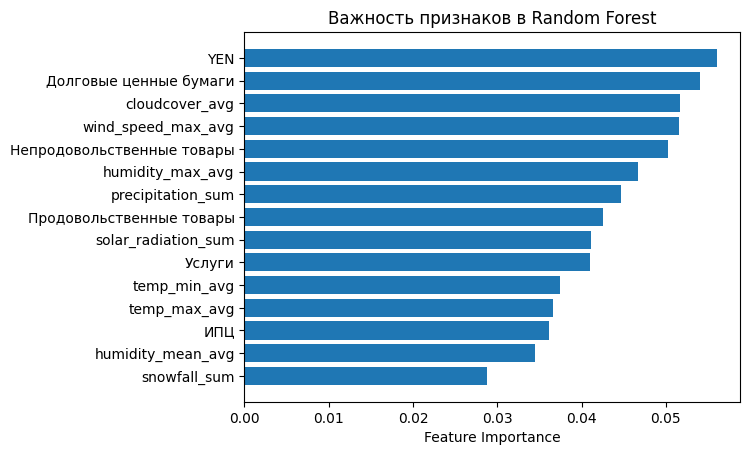

In [55]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=True)

plt.barh(feature_importances['feature'][-15:], feature_importances['importance'][-15:])
plt.xlabel('Feature Importance')
plt.title('Важность признаков в Random Forest')
plt.show()

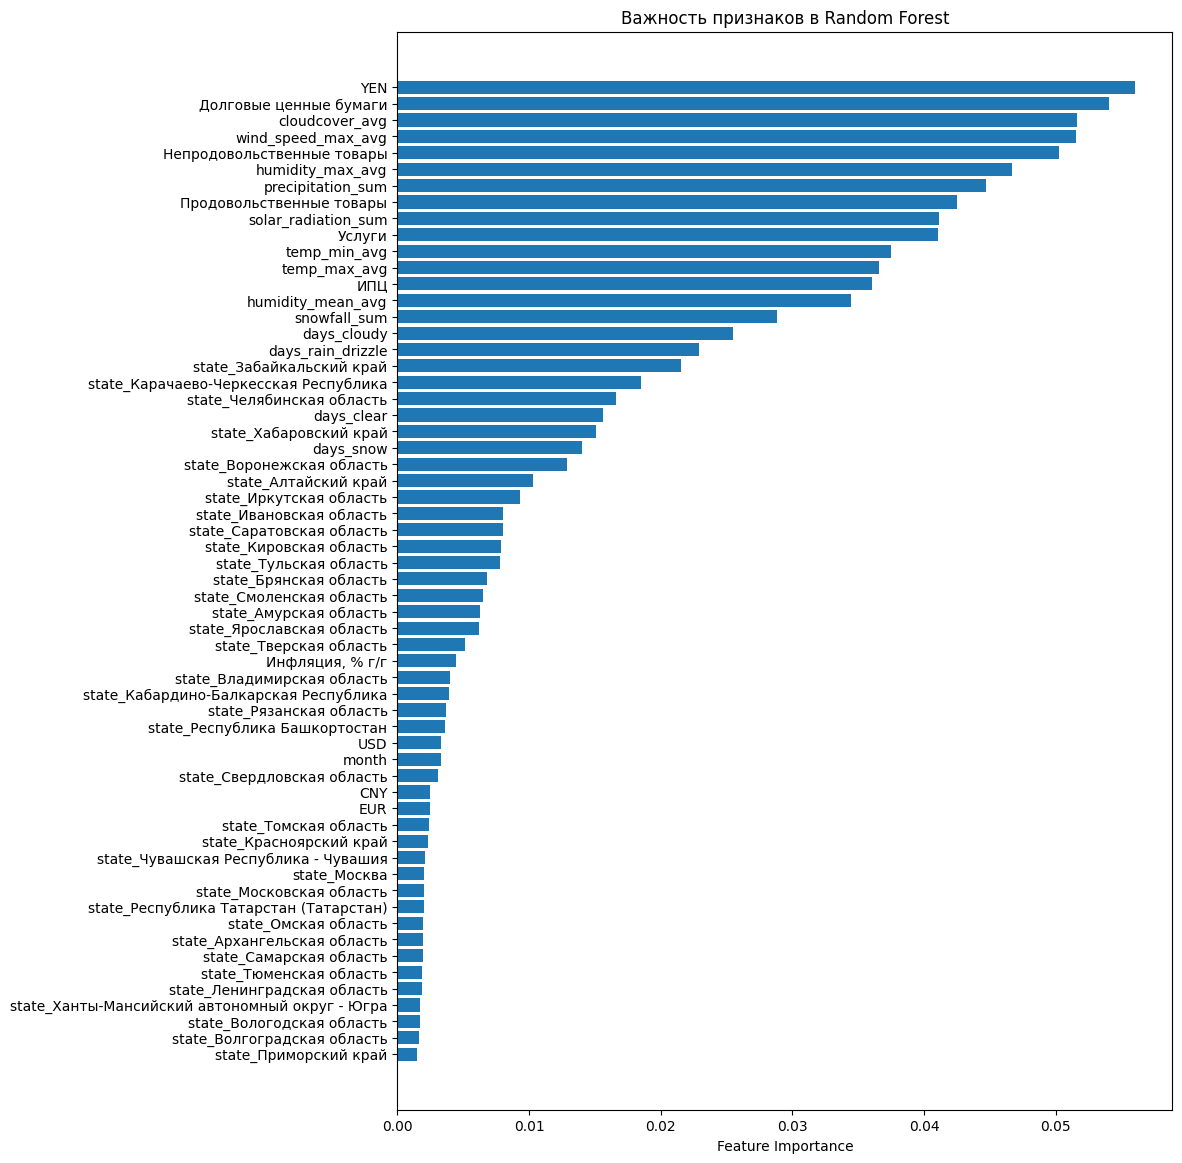

In [56]:
plt.figure(figsize=(10, 14))
plt.barh(feature_importances['feature'][-60:], feature_importances['importance'][-60:])
plt.xlabel('Feature Importance')
plt.title('Важность признаков в Random Forest')
plt.show()